<a href="https://colab.research.google.com/github/ugurtegin/Nonlinear_MMF_Network/blob/main/Simulations/BPM_SpokenDigit_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import tensorflow as tf


from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Activation, LSTM
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D 
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical, normalize

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io as sio
f = sio.loadmat('/content/drive/MyDrive/Optical DNN Project/1. MMF_Network_Paper/BPM_audio_digit_pred/flattened_longer.mat')
inp2 = f['flattened']

#Load data
f2 = sio.loadmat('/content/drive/MyDrive/Optical DNN Project/1. MMF_Network_Paper/BPM_audio_digit_pred/label2_2.mat')

out = f2['label2_2']


In [ ]:
input_data = inp2
output_data = to_categorical(out-1)

print('input_data : ', input_data.shape, input_data.dtype)
print('output_class : ', output_data.shape, output_data.dtype)
print()

input_data :  (3000, 484) float64
output_class :  (3000, 6) float32



In [ ]:
oran = 0.20
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=oran)

print('Test data : ', X_test.shape, X_test.dtype)
print('Training data : ', X_train.shape, X_train.dtype)
print()

Test data :  (600, 484) float64
Training data :  (2400, 484) float64



In [ ]:
model = Sequential()
model.add(Dense(6, input_dim=484, activation='softmax'))

In [ ]:
loss='categorical_crossentropy' # mean_absolute_error, cosine_proximity
metrics = ['accuracy']  # network accuracy metric to be determined after each epoch, mean_absolute_error, cosine_proximity

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt2, loss=loss, metrics=metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 2910      
Total params: 2,910
Trainable params: 2,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#setting final parameters for the network and it begins to train
number_of_iterations = 50
batch_size = 50

#history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=number_of_iterations)
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=number_of_iterations, verbose=1, validation_data=(X_test, y_test))
#Number of iterations run: 900

Epoch 1/50
48/48 [==============================] - 0s 5ms/step - loss: 1.7880 - accuracy: 0.1921 - val_loss: 1.7610 - val_accuracy: 0.2317
Epoch 2/50
48/48 [==============================] - 0s 2ms/step - loss: 1.7370 - accuracy: 0.3158 - val_loss: 1.7201 - val_accuracy: 0.3567
Epoch 3/50
48/48 [==============================] - 0s 2ms/step - loss: 1.6922 - accuracy: 0.4054 - val_loss: 1.6894 - val_accuracy: 0.3850
Epoch 4/50
48/48 [==============================] - 0s 2ms/step - loss: 1.6536 - accuracy: 0.4538 - val_loss: 1.6609 - val_accuracy: 0.3967
Epoch 5/50
48/48 [==============================] - 0s 2ms/step - loss: 1.6187 - accuracy: 0.4571 - val_loss: 1.6335 - val_accuracy: 0.4183
Epoch 6/50
48/48 [==============================] - 0s 2ms/step - loss: 1.5869 - accuracy: 0.4804 - val_loss: 1.6103 - val_accuracy: 0.4367
Epoch 7/50
48/48 [==============================] - 0s 2ms/step - loss: 1.5587 - accuracy: 0.4883 - val_loss: 1.5883 - val_accuracy: 0.4483
Epoch 8/50
48/48 [==

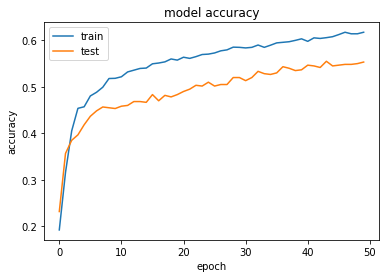

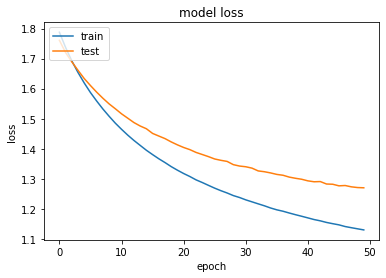

In [ ]:
from google.colab import files
# summarize history for loss
ls=plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.ylim(0.02,0.4)
ls.show()

ls=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.ylim(0.02,0.4)
ls.show()
#ls.savefig('/content/drive/My Drive/Sinc/loss-exp.png')
#files.download('loss-1.png')

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
los=history.history['loss']
val_los=history.history['val_loss']

sio.savemat('/content/drive/MyDrive/Optical DNN Project/1. MMF_Network_Paper/BPM_audio_digit_pred/speaker_acc_val_acc.mat',{'acc':acc,'val_acc':val_acc})
sio.savemat('/content/drive/MyDrive/Optical DNN Project/1. MMF_Network_Paper/BPM_audio_digit_pred/speaker_loss_val_loss.mat',{'loss':los,'val_loss':val_los})